## Supervised Machine Learning Regression Analysis

### Table of Contents:
    1. Import libraries and data
    2. Data cleaning
    3. Data prep for regression analysis
    4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Define path

path = r'/Users/jodikim/02_2023_Death_Penalty_Analysis'

In [4]:
# Import data for project

df = pd.read_csv(r'/Users/jodikim/02_2023_Death_Penalty_Analysis/02_Data/Prepared_Data/us_executions_cleaned.csv', index_col = False)

### 2. Data cleaning

In [5]:
df.head(20)

,Unnamed: 0,id,execution_volunteer,number_victims,juvenile,race,sex,region,country,state,...,asian_male_victims,native_amer_male_victims,other_race_male_victims,white_female_victims,black_female_victims,latino_female_victims,asian_female_victims,amerind_nativealask_female_victims,other_race_female_victims,victims_races
0,0,1,yes,1,no,White,Male,West,United States,Utah,...,0,0,0,0,0,0,0,0,0,White
1,1,2,no,1,no,White,Male,South,United States,Florida,...,0,0,0,0,0,0,0,0,0,White
2,2,3,yes,1,no,White,Male,West,United States,Nevada,...,0,0,0,0,0,0,0,0,0,White
3,3,4,yes,4,no,White,Male,Midwest,United States,Indiana,...,0,0,0,2,0,0,0,0,0,White
4,4,5,yes,1,no,White,Male,South,United States,Virginia,...,0,0,0,0,0,0,0,0,0,White
5,5,6,no,1,no,Black,Male,South,United States,Texas,...,0,0,0,0,0,0,0,0,0,White
6,6,7,no,1,no,White,Male,South,United States,Alabama,...,0,0,0,0,0,0,0,0,0,White
7,7,8,no,1,no,White,Male,South,United States,Mississippi,...,0,0,0,1,0,0,0,0,0,White
8,8,9,no,1,no,White,Male,South,United States,Florida,...,0,0,0,0,0,0,0,0,0,White
9,9,10,no,1,no,Black,Male,South,United States,Louisiana,...,0,0,0,0,0,0,0,0,0,Black


In [6]:
# Dropping column 'unnamed'

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.shape

(1561, 24)

In [8]:
# Selecting only the necessary columns, putting in a list called columns

columns = ["id", "execution_volunteer", "number_victims", "race", "sex", "state", "white_male_victims", "black_male_victims", "white_female_victims", "black_female_victims"]

In [9]:
# Creating a subset 

df_1 = df[columns]

### Missing values

In [10]:
# Checking for missing values

df_1.isnull().sum()

id                      0
execution_volunteer     0
number_victims          0
race                    0
sex                     0
state                   0
white_male_victims      0
black_male_victims      0
white_female_victims    0
black_female_victims    0
dtype: int64

### Duplicates check

In [11]:
# Checking for duplicates

dups = df_1.duplicated()

In [12]:
dups.shape # No dups

(1561,)

### Extreme Values Check

/Users/jodikim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='white_male_victims', ylabel='Density'>

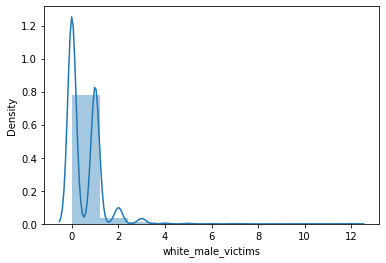

In [13]:
# Showing any extreme values

sns.distplot(df['white_male_victims'], bins=10) 

In [14]:
df['white_male_victims'].mean()

0.5361947469570788

In [15]:
df['white_male_victims'].median()

0.0

In [16]:
df['white_male_victims'].max()

12

### 3. Data prep for regression analysis

### Scatterplots

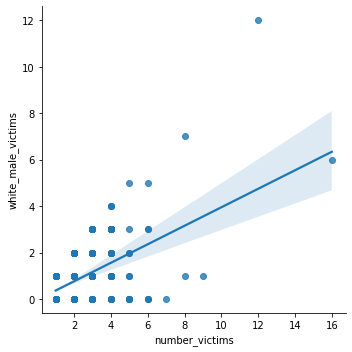

In [60]:
sns.lmplot(x = 'number_victims', y = 'white_male_victims', data = df)

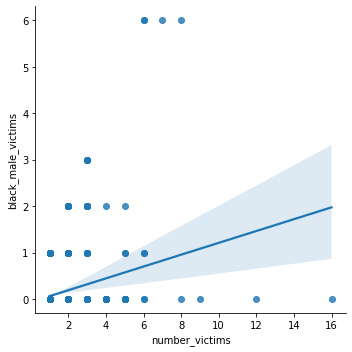

In [61]:
sns.lmplot(x = 'number_victims', y = 'black_male_victims', data = df)

### Hypothesis: 
    If the victim is a white male, then the person executed (who committed the crime) will have victimized more people (number of victims) compared to other races. 
    
    In other words, saying that out of all the people executed, if the crime was committed against more than 1 person, it will be against white males. 
    
    Testing to see if there is a relationship between number of victims and race, particularly white males. To see if the US system will punish people more harshly for committing crimes against white males vs other races in respect to quantity (how many people). 

In [62]:
# Reshaping the variables into NumPy arrays 

X = df['number_victims'].values.reshape(-1,1)
y = df['white_male_victims'].values.reshape(-1,1)

In [63]:
X

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [2]])

In [64]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [65]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [66]:
# Creating a regression object

regression = LinearRegression()

In [67]:
# Fitting the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

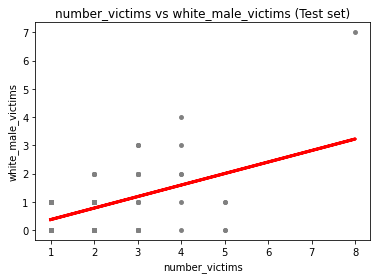

In [69]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('number_victims vs white_male_victims (Test set)')
plot_test.xlabel('number_victims')
plot_test.ylabel('white_male_victims')
plot_test.show()

#### The regression line is trending upwards, similar to the scatterplot. Let's see the results of the statistics

In [56]:
# Creating objects that contain model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [57]:
# Printing model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.70185172]]
Mean squared error:  0.5803783769137346
R2 score:  0.14289526154580234


In [58]:
y_predicted

array([[1.05786366],
       [1.05786366],
       [1.05786366],
       [1.05786366],
       [1.75971538],
       [1.05786366],
       [1.05786366],
       [1.05786366],
       [1.05786366],
       [1.75971538],
       [1.05786366],
       [1.05786366],
       [1.75971538],
       [1.05786366],
       [1.05786366],
       [1.05786366],
       [1.05786366],
       [1.75971538],
       [1.75971538],
       [1.05786366],
       [1.05786366],
       [1.05786366],
       [3.16341883],
       [1.05786366],
       [1.05786366],
       [1.75971538],
       [1.05786366],
       [1.05786366],
       [1.75971538],
       [1.05786366],
       [1.05786366],
       [1.75971538],
       [1.05786366],
       [1.05786366],
       [1.05786366],
       [1.05786366],
       [1.75971538],
       [1.05786366],
       [1.05786366],
       [1.05786366],
       [1.75971538],
       [1.75971538],
       [1.05786366],
       [1.05786366],
       [1.05786366],
       [1.05786366],
       [1.75971538],
       [1.057

In [59]:
# Creating a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,1.057864
1,1,1.057864
2,1,1.057864
3,1,1.057864
4,1,1.759715
5,1,1.057864
6,1,1.057864
7,1,1.057864
8,1,1.057864
9,2,1.759715


#### Interpreting the results:
    The slope indicates a positive relationship. However, looking at the model it says executed people have committed more crimes against 4 or less victims that are white males. Perhaps there is not a strong relationship between race and number of victims. Also I would need to test this with other races to see if victims who are white males are higher, lower, or outliers. 
    
    I'm more interested to see if there is a relationship between the executed and race. Are people of color executed at higher rates than other races? Much of the data lends itself to more categorical variables. I look forward to testing those relationships and finding any patterns. 